## Pytorch基础

In [ ]:
import torch
from torch import nn

print(torch.cuda.is_available()) # true 查看GPU是否可用

print(torch.cuda.device_count()) #GPU数量， 1

torch.cuda.current_device() #当前GPU的索引， 0

torch.cuda.get_device_name(0) #输出GPU名称

True
1


'NVIDIA GeForce GTX 1650'

### 1. Tensor操作

In [1]:
import torch

w = torch.tensor(2)
b = torch.tensor(3)
x = torch.tensor(1)

In [2]:
y = w * x + b

In [3]:
y

tensor(5)

In [4]:
w = torch.randn(3, 2, requires_grad=True)  # 3 * 2 矩阵    两个神经元   requires_grad=True需要梯度 w和b我们作为参数，后续最小化loss需要参数的梯度
b = torch.randn(2, requires_grad=True)     # 两个神经元的偏置b1 b2
x = torch.randn(1, 3)  # 1 * 3        一个样本三个特征

In [5]:
y = x @ w + b  # @ 为矩阵乘
y

tensor([[-0.0409, -0.0335]], grad_fn=<AddBackward0>)

In [6]:
import torch.nn.functional as F
y = F.relu(y)   # 激活函数 x<0,y=0 x>=0, y=x
y

tensor([[0., 0.]], grad_fn=<ReluBackward0>)

### 2. 自动微分机制

In [7]:
Y = torch.randn(1,2)  # 标签
loss = F.cross_entropy(y, Y)   # 模型输出和标签的交叉熵损失

In [8]:
loss.backward()   # 反向传播

In [9]:
w.grad

tensor([[0., 0.],
        [-0., -0.],
        [0., 0.]])

In [10]:
loss.grad_fn

In [11]:
y.grad_fn

### 3. 训练过程  五步：前向传播 求得损失 反向传播 梯度下降更新参数 梯度清零

### 4. 数据处理

In [12]:
import torchvision
import torch
from torchvision import datasets, transforms


In [27]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5], std=[0.5])])
data_train = datasets.MNIST(root = "./data", transform=transform, train=True)
data_test = datasets.MNIST(root = "./data", transform=transform, train=False)

In [28]:
print(len(data_train))

60000


In [29]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train, batch_size=64, shuffle=True)
data_loader_test = torch.utils.data.DataLoader(dataset=data_test, batch_size=64, shuffle=True)

In [30]:
data_loader_train.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

[tensor(0), tensor(3), tensor(5), tensor(2), tensor(1), tensor(9), tensor(9), tensor(5), tensor(6), tensor(7), tensor(7), tensor(7), tensor(1), tensor(2), tensor(9), tensor(6), tensor(2), tensor(3), tensor(1), tensor(9), tensor(1), tensor(5), tensor(9), tensor(9), tensor(1), tensor(2), tensor(4), tensor(9), tensor(9), tensor(1), tensor(1), tensor(2), tensor(8), tensor(5), tensor(9), tensor(3), tensor(5), tensor(9), tensor(7), tensor(4), tensor(2), tensor(8), tensor(9), tensor(3), tensor(6), tensor(9), tensor(8), tensor(4), tensor(9), tensor(1), tensor(4), tensor(3), tensor(3), tensor(8), tensor(7), tensor(6), tensor(7), tensor(2), tensor(2), tensor(4), tensor(4), tensor(1), tensor(5), tensor(3)]


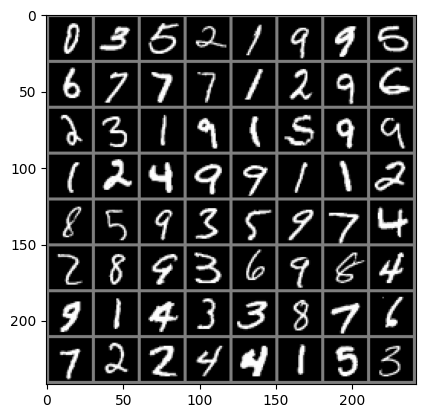

In [31]:
import matplotlib.pyplot as plt
import os
import torchvision
import numpy as np
from torch.autograd import Variable
%matplotlib inline


images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [15]:
import torch.nn as nn

#### 网络结构 784（28 * 28） 500 88 10
#### 构建全连接网络

In [32]:
class MNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 88)
        self.fc3 = nn.Linear(88, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
mnist = MNIST()
from torch import optim as opt
optimizer = opt.Adam(mnist.parameters(), lr=0.001)
epochs = 8
for epoch in range(epochs):
    for data, labels in data_loader_train:
        data = data.view(data.size(0), -1)  # Flatten the input data
        y = mnist(data)
        loss = F.cross_entropy(y, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(epoch, loss)

0 tensor(0.0939, grad_fn=<NllLossBackward0>)
1 tensor(0.0348, grad_fn=<NllLossBackward0>)
2 tensor(0.0707, grad_fn=<NllLossBackward0>)
3 tensor(0.1923, grad_fn=<NllLossBackward0>)
4 tensor(0.0981, grad_fn=<NllLossBackward0>)
5 tensor(0.1460, grad_fn=<NllLossBackward0>)
6 tensor(0.0113, grad_fn=<NllLossBackward0>)
7 tensor(0.0275, grad_fn=<NllLossBackward0>)


In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MNIST().to(device)
from torch import optim as opt
optimizer = opt.Adam(mnist.parameters(), lr=0.001)
epochs = 8
for epoch in range(epochs):
    for data, labels in data_loader_train:
        data = data.view(data.size(0), -1)  # Flatten the input data
        data = data.to(device)
        labels = labels.to(device)
        y = model(data)
        loss = F.cross_entropy(y, labels).to(device)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(epoch, loss)

0 tensor(2.2861, device='cuda:0', grad_fn=<NllLossBackward0>)
1 tensor(2.3047, device='cuda:0', grad_fn=<NllLossBackward0>)
2 tensor(2.3015, device='cuda:0', grad_fn=<NllLossBackward0>)
3 tensor(2.3102, device='cuda:0', grad_fn=<NllLossBackward0>)
4 tensor(2.3127, device='cuda:0', grad_fn=<NllLossBackward0>)
5 tensor(2.3050, device='cuda:0', grad_fn=<NllLossBackward0>)
6 tensor(2.3316, device='cuda:0', grad_fn=<NllLossBackward0>)
7 tensor(2.3187, device='cuda:0', grad_fn=<NllLossBackward0>)


In [40]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(stride=2,kernel_size=2))
        self.dense = torch.nn.Sequential(torch.nn.Linear(14*14*128,1024),
                                         torch.nn.ReLU(),
                                         torch.nn.Dropout(p=0.5),
                                         torch.nn.Linear(1024, 10))
    def forward(self, x):
        x = self.conv1(x)
        #x = self.conv2(x)
        x = x.view(-1, 14*14*128)
        x = self.dense(x)
        return x

In [46]:
model = Model().cuda()
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [47]:
cost = torch.nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 5

In [49]:
for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch, n_epochs))
    print("-"*10)
    for data in data_loader_train:
        X_train, y_train = data
        X_train = X_train.cuda()
        y_train = y_train.cuda()
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train)
        _,pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = cost(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_correct += torch.sum(pred == y_train.data)
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        X_test = X_test.cuda()
        y_test = y_test.cuda()
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is:{:.4f}, Train Accuracy is:{:.4f}%, Test Accuracy is:{:.4f}".format(running_loss/len(data_train),
                                                                                      100*running_correct/len(data_train),
                                                                                      100*testing_correct/len(data_test)))
torch.save(model.state_dict(), "model_parameter.pkl")

Epoch 0/5
----------
Loss is:0.0007, Train Accuracy is:98.6383%, Test Accuracy is:98.7200
Epoch 1/5
----------
Loss is:0.0005, Train Accuracy is:99.1283%, Test Accuracy is:98.8300
Epoch 2/5
----------
Loss is:0.0003, Train Accuracy is:99.2700%, Test Accuracy is:98.8900
Epoch 3/5
----------
Loss is:0.0003, Train Accuracy is:99.4500%, Test Accuracy is:98.7900
Epoch 4/5
----------
Loss is:0.0002, Train Accuracy is:99.5450%, Test Accuracy is:99.0200


Predict Label is: [tensor(8, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0')]
Real Label is: [tensor(8, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0')]


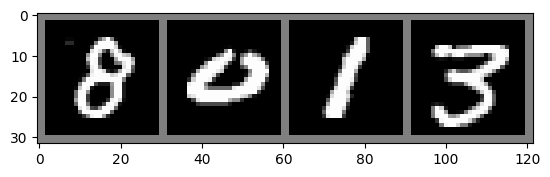

In [53]:

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))
X_test = X_test.cuda()
y_test = y_test.cuda()
inputs = Variable(X_test)
pred = model(inputs)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Real Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.cpu().numpy().transpose(1,2,0)

std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)